In [ ]:
#importing necessary files 
!pip install selenium
!apt-get -q update   #Used to handle installation and removal of softwares and libraries
!apt install -yq chromium-chromedriver #ChromeDriver is a separate executable that Selenium WebDriver uses to control Chrome.
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver 
import pandas as pd
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")

#WebDriver is a browser automation framework that works with open source APIs. 
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome('chromedriver',options=options)


     |████████████████████████████████| 904 kB 8.8 MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:14 http://ppa.launchpad.net

In [ ]:
!pip install pillow
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
from pandas import Series, DataFrame
import statsmodels.api as sm
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import operator
import re,string
from patsy import dmatrices
%pylab inline
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
import numpy as np
from PIL import Image
from patsy import dmatrices
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
import warnings
%pylab inline
import numpy as np
from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances
drive.mount('/drive') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Mounted at /drive


In [ ]:
stop = set(stopwords.words('english'))
punc = string.punctuation    

# WORDCLOUDS

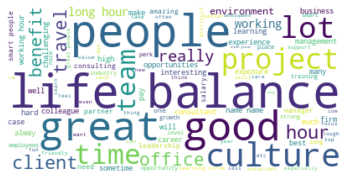

In [ ]:
#BCG WordCloud
BCG = pd.read_csv('/drive/My Drive/BCG_Reviews.csv',encoding= 'unicode_escape')

BCG['Reviews'] = BCG['Pros'] + BCG['Cons']
# clean punctuation and white spaces of both pro and cons
BCG['Reviews'] = BCG['Reviews'].apply(lambda x:re.sub(r'[^\w\s]', ' ', x.lower()))
BCG['Reviews'] = BCG['Reviews'].apply(lambda x:re.sub(r'(\\n+)', ' ', x))

reviews = str(BCG['Reviews'].sum())
#d = getcwd()
#mask = np.array(Image.open(path.join(d, "apple-logo.jpg")))
stop = set(STOPWORDS)
stop.update(['BCG','work','job','employee','customer', 'company'])
wordcloud = WordCloud(stopwords=stop, max_font_size=75, max_words=100, background_color="white").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#convert to file
wordcloud.to_file("BCG.png")

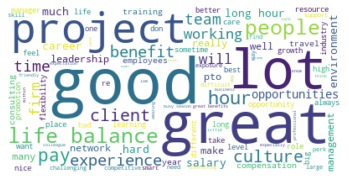

In [ ]:
#Deloitte WordCloud
Deloitte = pd.read_csv('/drive/My Drive/Deloitte_Reviews.csv')

Deloitte['Reviews'] = Deloitte['Pros'] + Deloitte['Cons']
Deloitte['Reviews'] = Deloitte['Reviews'].astype(str)
#clean punctuation and white spaces of both pro and cons
Deloitte['Reviews'] = Deloitte['Reviews'].apply(lambda x:re.sub(r'[^\w\s]', ' ', x.lower()))
Deloitte['Reviews'] = Deloitte['Reviews'].apply(lambda x:re.sub(r'(\\n+)', ' ', x))

reviews = str(Deloitte['Reviews'].sum())
stop = set(STOPWORDS)
stop.update(['Deloitte','work','job','employee','customer', 'company'])
wordcloud = WordCloud(stopwords=stop, max_font_size=75, max_words=100, background_color="white").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#convert to file
wordcloud.to_file("Deloitte.png")

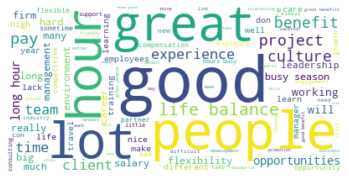

In [ ]:
#EY WordCloud
EY = pd.read_csv('/drive/My Drive/EY_Reviews.csv')

EY['Reviews'] = EY['Pros'] + EY['Cons']
EY['Reviews'] = EY['Reviews'].astype(str)
#clean punctuation and white spaces of both pro and cons
EY['Reviews'] = EY['Reviews'].apply(lambda x:re.sub(r'[^\w\s]', ' ', x.lower()))
EY['Reviews'] = EY['Reviews'].apply(lambda x:re.sub(r'(\\n+)', ' ', x))

reviews = str(EY['Reviews'].sum())
stop = set(STOPWORDS)
stop.update(['EY','work','job','employee','customer', 'company'])
wordcloud = WordCloud(stopwords=stop, max_font_size=75, max_words=100, background_color="white").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#convert to file
wordcloud.to_file("EY.png")

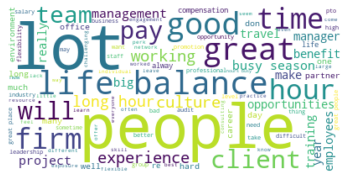

In [ ]:
#KPMG WordCloud
KPMG = pd.read_csv('/drive/My Drive/KPMG_Reviews.csv')

KPMG['Reviews'] = KPMG['Pros'] + KPMG['Cons']
KPMG['Reviews'] = KPMG['Reviews'].astype(str)
#clean punctuation and white spaces of both pro and cons
KPMG['Reviews'] = KPMG['Reviews'].apply(lambda x:re.sub(r'[^\w\s]', ' ', x.lower()))
KPMG['Reviews'] = KPMG['Reviews'].apply(lambda x:re.sub(r'(\\n+)', ' ', x))

reviews = str(KPMG['Reviews'].sum())
stop = set(STOPWORDS)
stop.update(['KPMG','work','job','employee','customer', 'company'])
wordcloud = WordCloud(stopwords=stop, max_font_size=75, max_words=100, background_color="white").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#convert to file
wordcloud.to_file("KPMG.png")

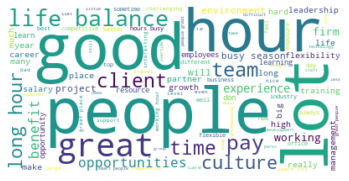

In [ ]:
#PwC WordCloud
PwC = pd.read_csv('/drive/My Drive/PwC_Reviews.csv')

PwC['Reviews'] = PwC['Pros'] + PwC['Cons']
PwC['Reviews'] = PwC['Reviews'].astype(str)
#clean punctuation and white spaces of both pro and cons
PwC['Reviews'] = PwC['Reviews'].apply(lambda x:re.sub(r'[^\w\s]', ' ', x.lower()))
PwC['Reviews'] = PwC['Reviews'].apply(lambda x:re.sub(r'(\\n+)', ' ', x))

reviews = str(PwC['Reviews'].sum())
stop = set(STOPWORDS)
stop.update(['PwC','pwc','PWC','work','job','employee','customer', 'company'])
wordcloud = WordCloud(stopwords=stop, max_font_size=75, max_words=100, background_color="white").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#convert to file
wordcloud.to_file("PwC.png")

# PROS & CONS

## HI MIGUEL!!! PLS SOLVE THIS FOR ME 

I HAVE DEFINED WHAT CHUNK IS WHAT & I'M SURE IT IS SUCH A SMALL THING BUT IT IS DRIVING ME CRAZY

oops caps

when i get it to work, the image doesn't really come out anyways. It just looks like a square but weird inside..

## this is where I started messing around with it

In [ ]:
def read_file(file_id):
  """ 
  Download file from Google Drive 
  Argument: file_id
  Returns: downloaded file
  """
  
  file_id = file_id

  import io
  from googleapiclient.http import MediaIoBaseDownload

  request = drive_service.files().get_media(fileId=file_id)
  downloaded = io.BytesIO()
  downloader = MediaIoBaseDownload(downloaded, request)
  done = False
  while done is False:
    # _ is a placeholder for a progress object that we ignore.
    # (Our file is small, so we skip reporting progress.)
    _, done = downloader.next_chunk()

  downloaded.seek(0)
  return downloaded


def google_authenticate():
  # Authenticate first so the Google Drive library can detect your credentials.
  from google.colab import auth
  auth.authenticate_user()

  from googleapiclient.discovery import build
  drive_service = build('drive', 'v3')
  return drive_service

drive_service = google_authenticate()

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&state=jNpNvK2gLZcXmECiiBepoZLY71meD2&prompt=consent&access_type=offline&code_challenge=PGyDsYEfPJ3b-aJLbnkje31IbZ4xsV2K1FuqkUbXcQ4&code_challenge_method=S256

Enter verification code: 4/1AX4XfWgItlc_c2Cs69BnpUdF6oTXkmYAS0w4izR9nNiWRXclAHStlBLQKH0


In [ ]:
#pros wordcloud
BCG['Pros'] = BCG['Pros'].apply(lambda x:re.sub(r'[^\w\s]', ' ', x.lower()))
BCG['Pros'] = BCG['Pros'].apply(lambda x:re.sub(r'(\\n+)', ' ', x))
BCG['Pros'] = BCG['Pros'].apply(lambda x:re.sub(r'^b[\'\"\'"\"''\s]', '', x.lower()))
BCG['Pros'] = BCG['Pros'].apply(lambda x:re.sub(r'\s+', ' ', x))

pros = str(BCG['Pros'].sum())

from google.colab import files

reply = (input('Do you want to upload the image from your pc (yes/no)? '))
if reply == 'yes':
  image_file = files.upload()
else:
  image_url = input('Ok, in this case just paste the image url: ')
  image_file = Image.open(urllib.request.urlopen(image_url))
print(' ')
print('Upload completed.')
print(' ')
  
mask = np.array(image_file)

from nltk.corpus import stopwords
stoplist = set(stopwords.words("english"))

#wordcloud = WordCloud(max_font_size=200, max_words=100, background_color="white", mask = mask).generate(pros)

wc = WordCloud(scale=5,background_color="white", min_font_size=1, 
                max_words=100, mask=mask, stopwords=stoplist,repeat=True)
wc.generate(pros)


plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

NameError: ignored

## THIS IS WHAT WE'RE AIMING FOR, JUST WITH PROS

I DIDN'T TOUCH THIS CODE. THIS IS FROM THE ORIGINAL PYTHON DOC

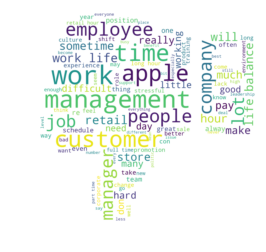

In [ ]:
#cons wordcloud
apple['Cons'] = apple['Cons'].apply(lambda x:re.sub(r'[^\w\s]', ' ', x.lower()))
apple['Cons'] = apple['Cons'].apply(lambda x:re.sub(r'(\\n+)', ' ', x))
apple['Cons'] = apple['Cons'].apply(lambda x:re.sub(r'^b[\'\"\'"\"''\s]', '', x.lower()))
apple['Cons'] = apple['Cons'].apply(lambda x:re.sub(r'\s+', ' ', x))

cons = str(apple['Cons'].sum())
d = getcwd()
mask = np.array(Image.open(path.join(d, "thumbsdown.jpg")))
wordcloud = WordCloud(max_font_size=200, max_words=100, background_color="white", mask = mask).generate(cons)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
